# Section 01: **Statistics**

### **`01-Smoothing`**

-   Look at the structure of `mtcars`.

-   Using `mtcars`, draw a scatter plot of `mpg` vs. `wt`.

In [1]:
library(tidyverse)
mtcars <- read.csv("..\\00_Datasets\\mtcars_v2.csv", header=TRUE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



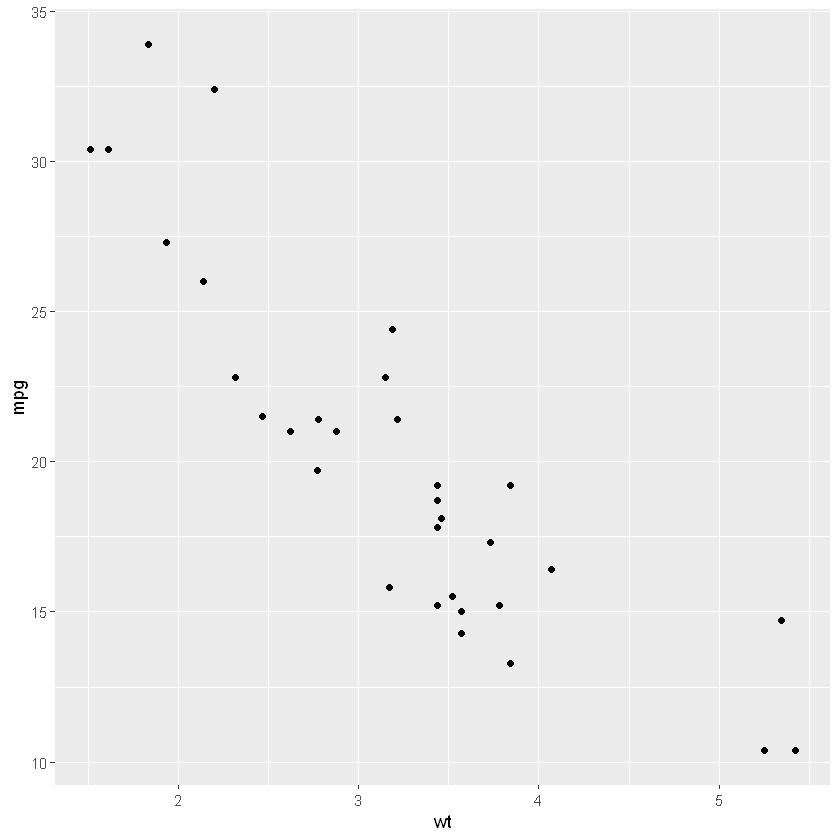

In [2]:
# View the structure of mtcars
ggplot(mtcars, aes(x = wt, y = mpg)) + 

# Using mtcars, draw a scatter plot of mpg vs. wt
geom_point()

-   Update the plot to add a smooth trend line. Use the default method, which uses the LOESS model to fit the curve.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



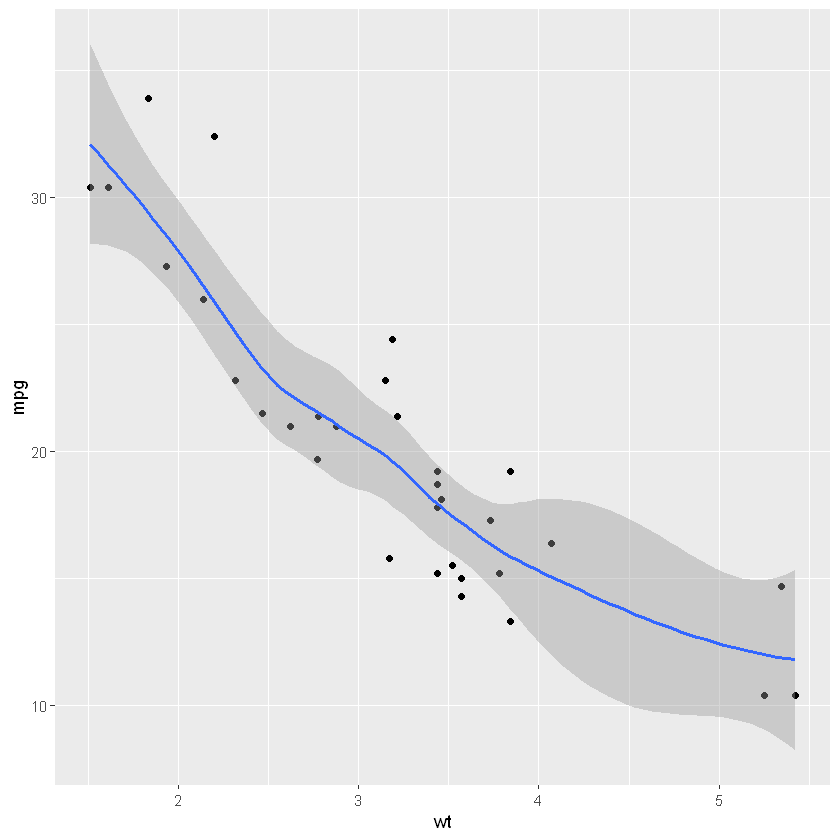

In [3]:
# Amend the plot. Use lin. reg. smoothing; turn off std err ribbon
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  geom_smooth()

-   Update the smooth layer. Apply a linear model by setting `method` to `"lm"`, and turn off the model's 95% confidence interval (the ribbon) by setting `se` to `FALSE`.

`geom_smooth()` using formula 'y ~ x'



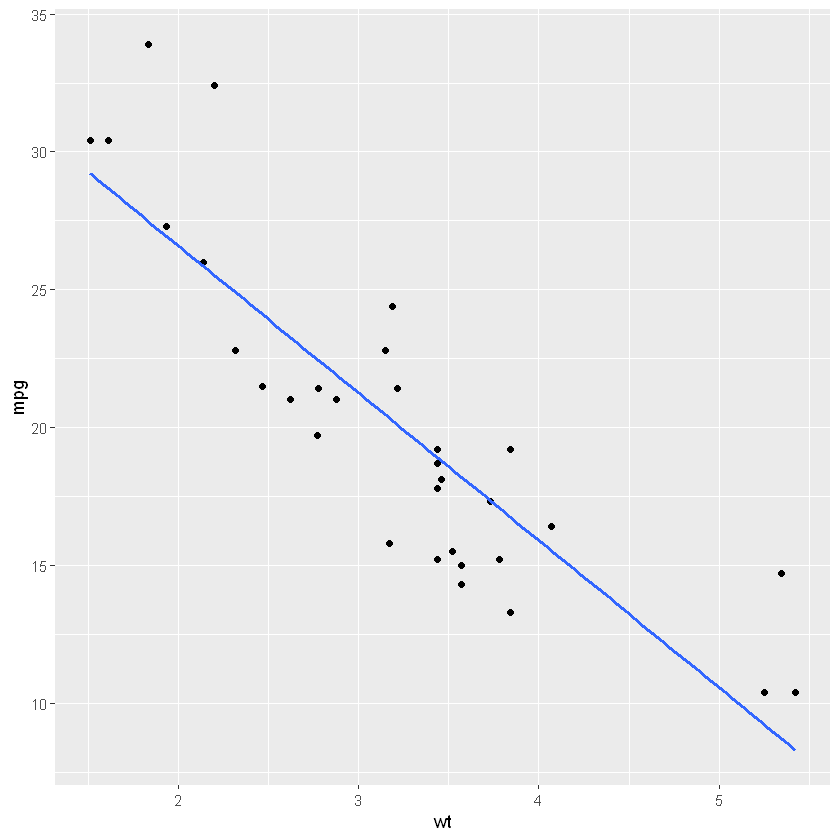

In [4]:
# Amend the plot. Swap geom_smooth() for stat_smooth().
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

-   Draw the same plot again, swapping `geom_smooth()` for `stat_smooth()`.

`geom_smooth()` using formula 'y ~ x'



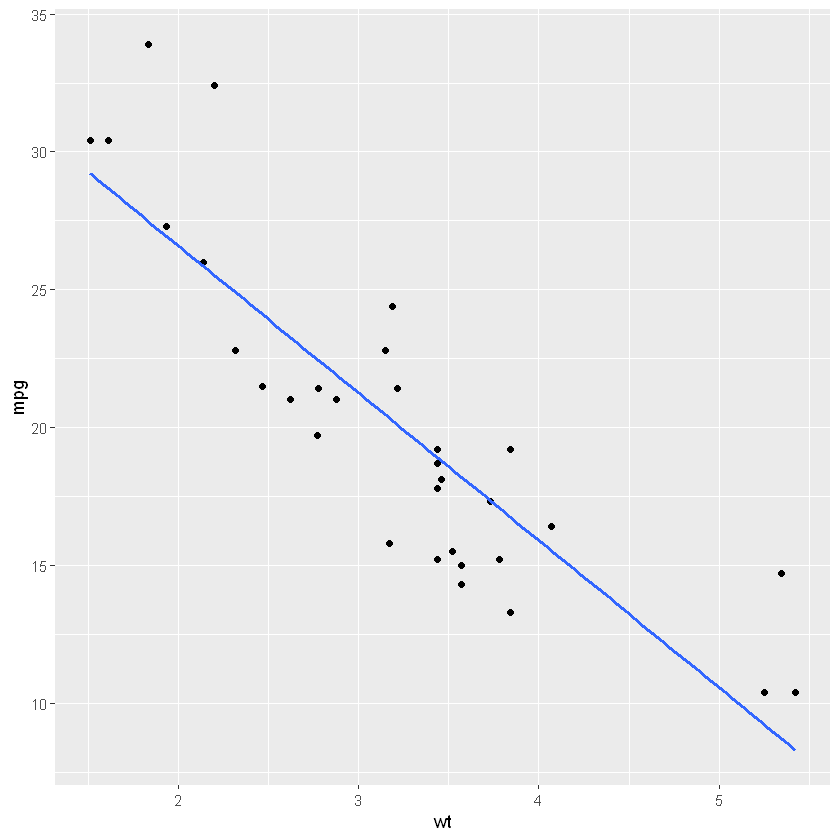

In [5]:
# Amend the plot. Swap geom_smooth() for stat_smooth().
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

### `02-Grouping variables`

-   Using `mtcars`, plot `mpg` vs. `wt`, colored by `fcyl`.

-   Add a point layer.

-   Add a smooth stat using a linear model, and don't show the `se` ribbon.

`geom_smooth()` using formula 'y ~ x'



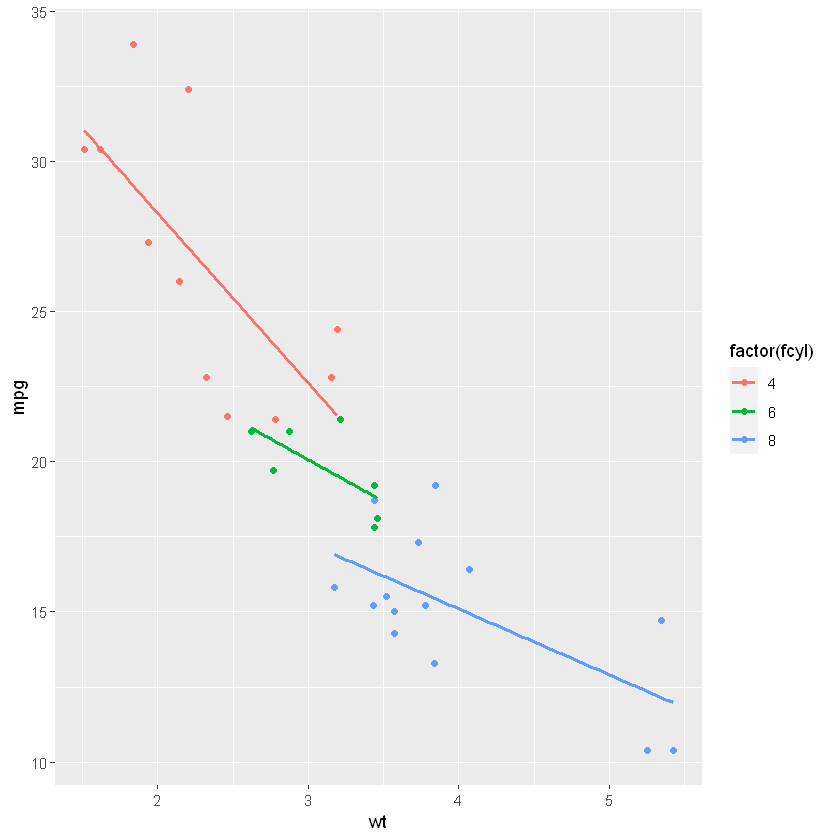

In [6]:
# Using mtcars, plot mpg vs. wt, colored by fcyl
ggplot(mtcars, aes(wt, mpg, color = factor(fcyl))) +
  # Add a point layer
  geom_point() +
  # Add a smooth lin reg stat, no ribbon
  stat_smooth(method = 'lm', se = FALSE)

-   Update the plot to add a second smooth stat.

    -   Add a dummy `group` aesthetic to this layer, setting the value to `1`.

    -   Use the same `method` and `se` values as the first stat smooth layer.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



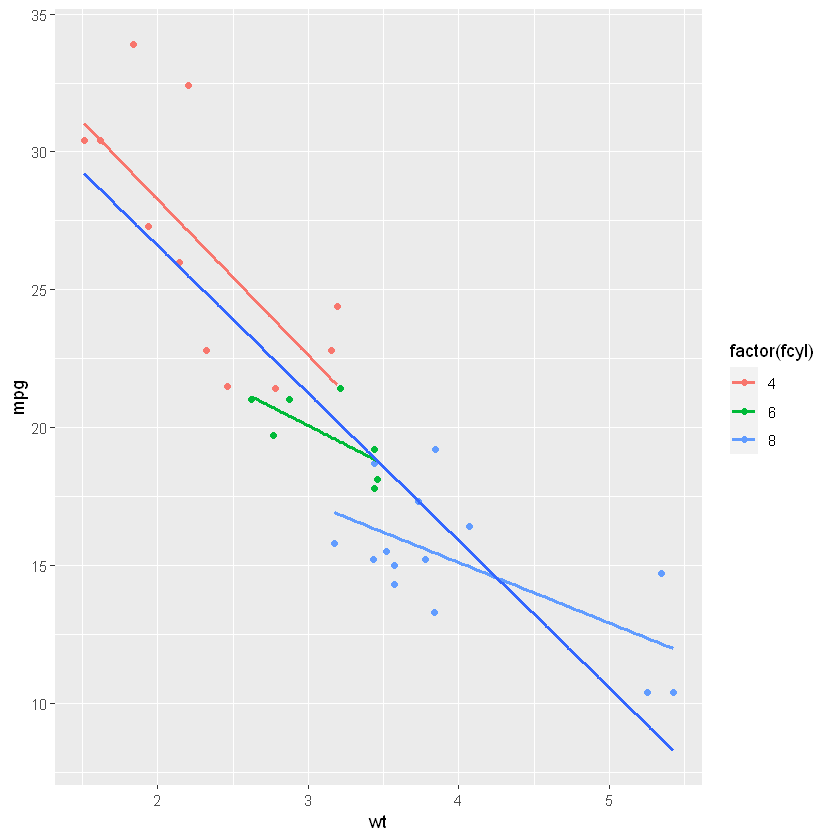

In [7]:
# Amend the plot to add another smooth layer with dummy grouping
ggplot(mtcars, aes(wt, mpg, color = factor(fcyl))) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE) + 
  stat_smooth(aes(group = 1), method = 'lm', se = FALSE)

### **`03-Modifying stat_smooth`**

Explore the effect of the `span` argument on LOESS curves. Add three smooth LOESS stats, each without the standard error ribbon.

-   Color the 1st one `"red"`; set its `span` to `0.9`.

-   Color the 2nd one `"green"`; set its `span` to `0.6`.

-   Color the 3rd one `"blue"`; set its `span` to `0.3`.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



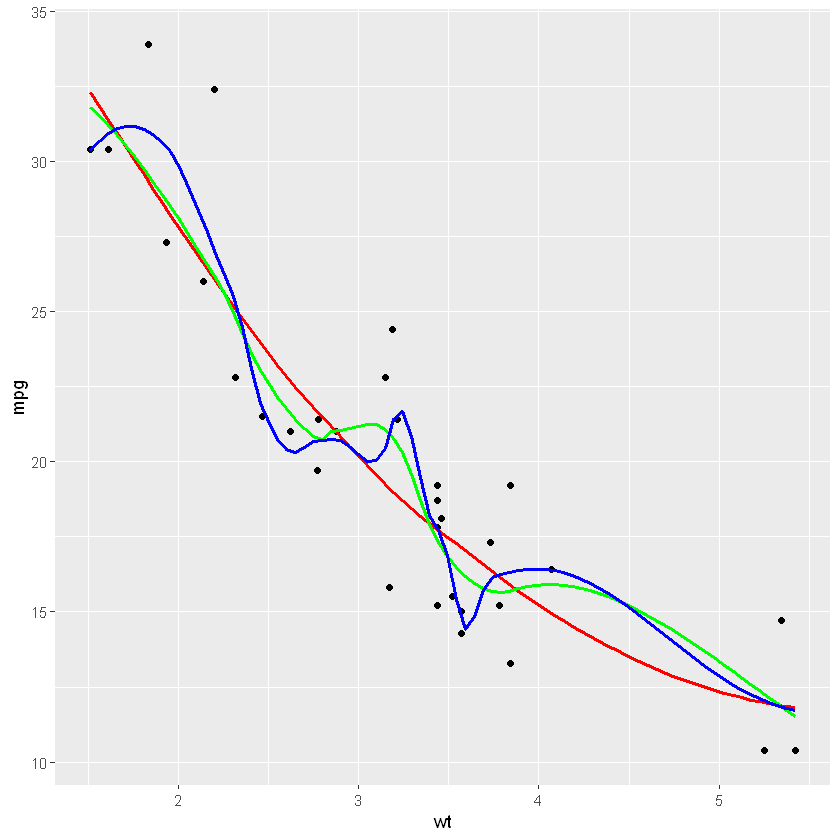

In [8]:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  # Add 3 smooth LOESS stats, varying span & color
  stat_smooth(se = FALSE, color  = "red", span = 0.9) +
  stat_smooth(se = FALSE, color  = "green", span = 0.6) +
  stat_smooth(se = FALSE, color  = "blue", span = 0.3)

Compare LOESS and linear regression smoothing on small regions of data.

-   Add a smooth LOESS stat, without the standard error ribbon.

-   Add a smooth linear regression stat, again without the standard error ribbon.


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



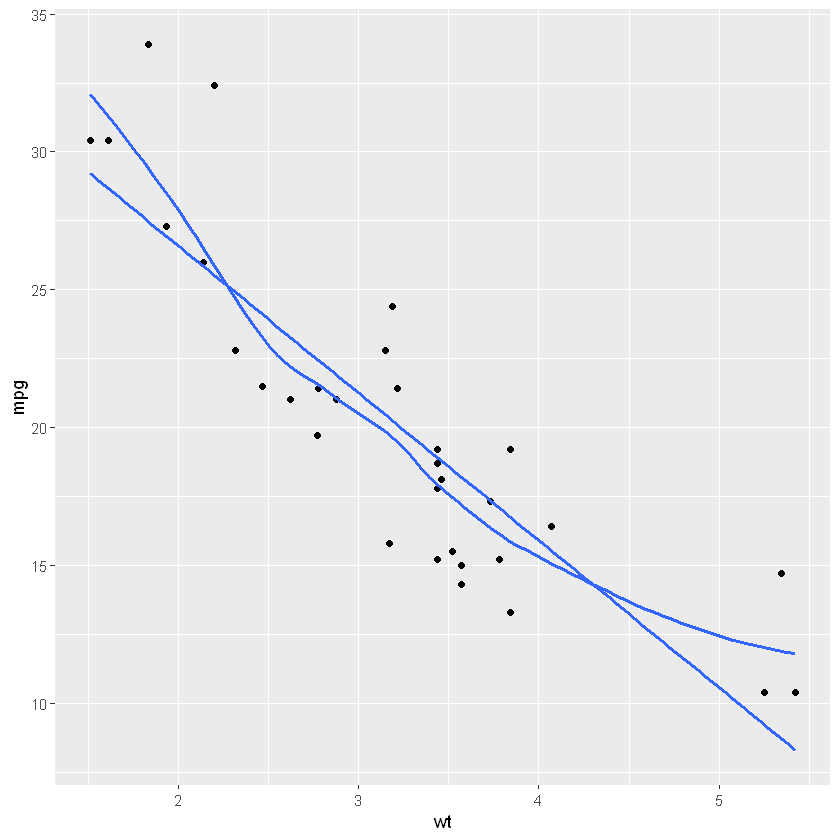

In [9]:
# Amend the plot to color by fcyl
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  # Add a smooth LOESS stat, no ribbon
  stat_smooth(se = FALSE) +
  # Add a smooth lin. reg. stat, no ribbon
  stat_smooth(method = "lm", se = FALSE)

LOESS isn't great on very short sections of data; compare the pieces of linear regression to LOESS over the whole thing.

-   Amend the smooth LOESS stat to map `color` to a dummy variable, `"All"`.

Warning message:
"Ignoring unknown aesthetics: method"
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



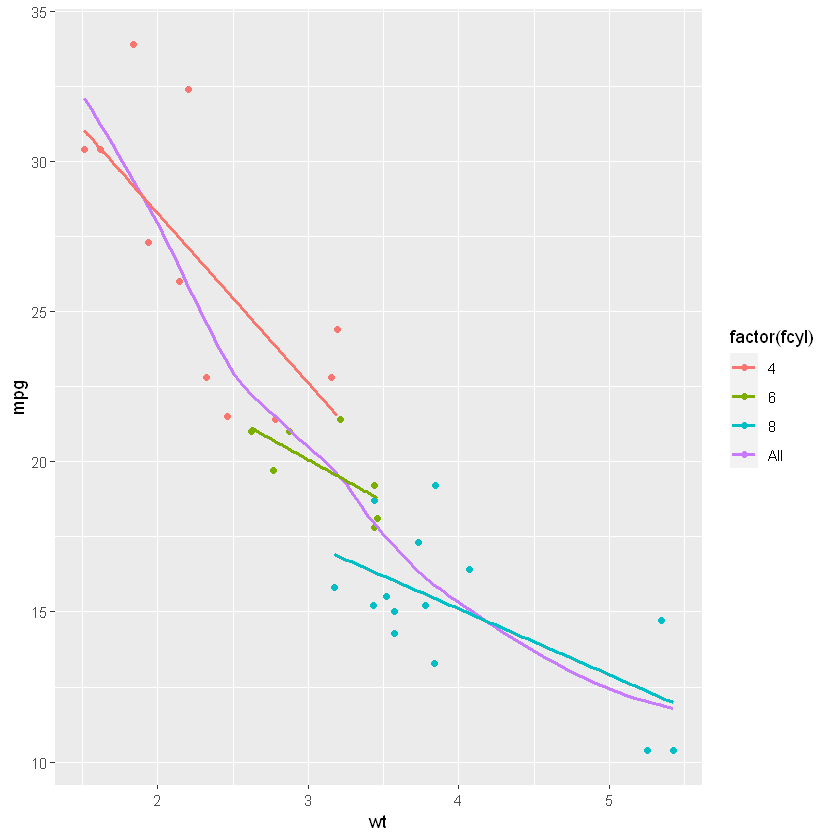

In [10]:
# Amend the plot
ggplot(mtcars, aes(x = wt, y = mpg, color = factor(fcyl))) +
  geom_point() +
  # Map color to dummy variable "All"
  stat_smooth(se = FALSE, aes(color = "All", method = "loess")) +
  stat_smooth(se = FALSE, method = "lm")

### **`04-Modifying stat_smooth (2)`**

-   Using `Vocab`, plot `vocabulary` vs. `education`, colored by `year_group`.

-   Use `geom_jitter()` to add jittered points with transparency `0.25`.

Add a smooth linear regression stat (with the standard error ribbon).

In [11]:
Vocab <- read.csv("..\\00_Datasets\\Vocab_v2.csv", header=TRUE)

`geom_smooth()` using formula 'y ~ x'



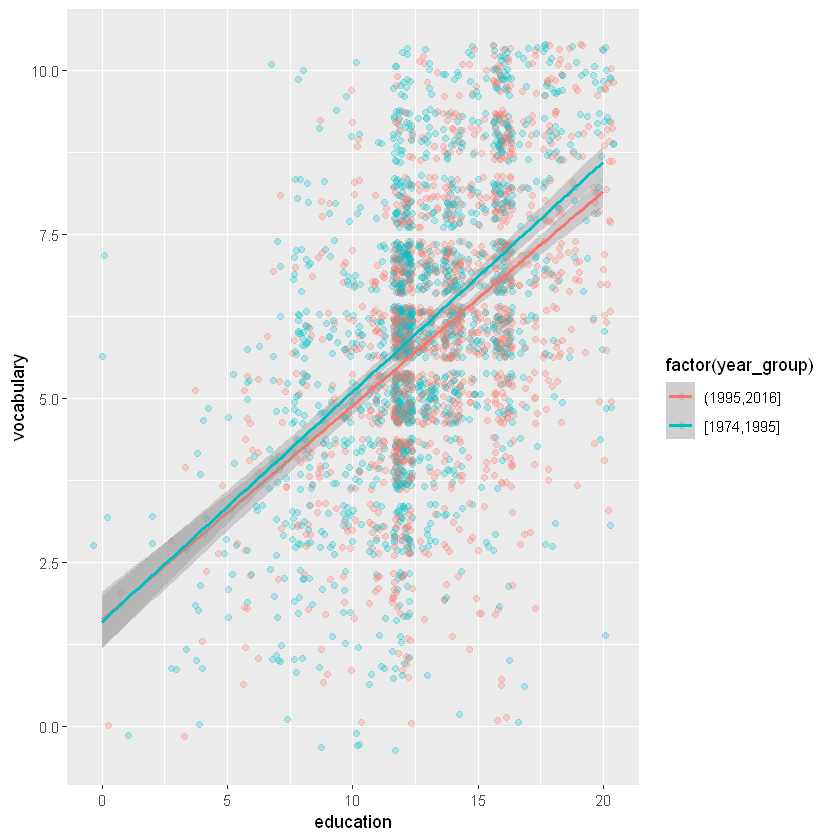

In [12]:
# Using Vocab, plot vocabulary vs. education, colored by year group
ggplot(Vocab, aes(education, vocabulary, color = factor(year_group))) +
  # Add jittered points with transparency 0.25
  geom_jitter(alpha = 0.25) +
  # Add a smooth lin. reg. line (with ribbon)
  stat_smooth(method = "lm",se = TRUE)

It's easier to read the plot if the standard error ribbons match the lines, and the lines have more emphasis.

-   Update the smooth stat.

    -   Map the fill color to `year_group`.

    -   Set the line size to `2`.

`geom_smooth()` using formula 'y ~ x'



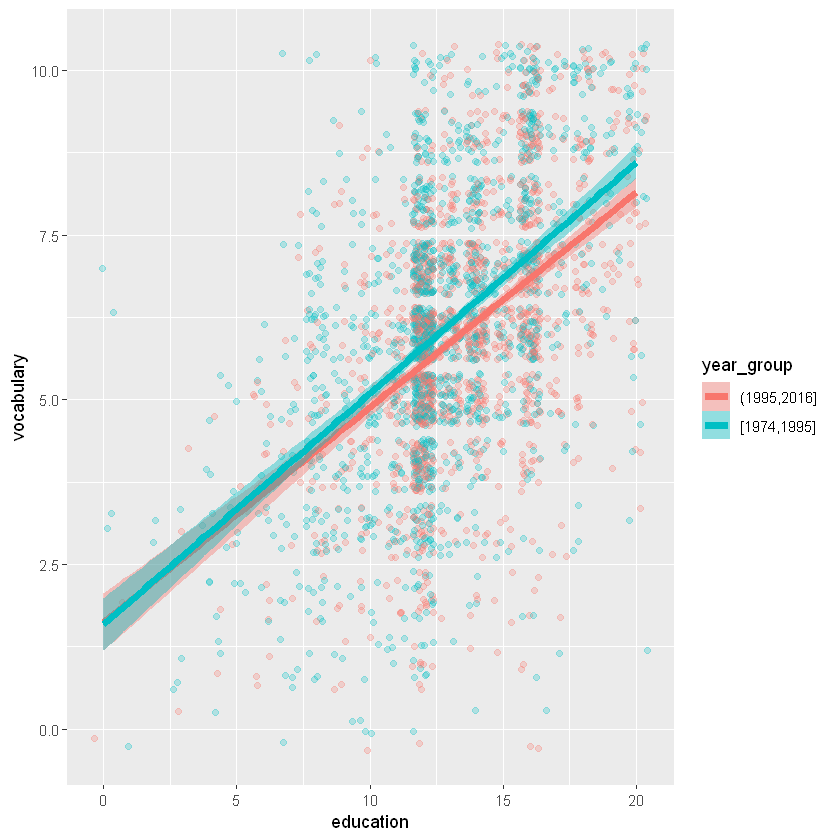

In [13]:
# Amend the plot
ggplot(Vocab, aes(x = education, y = vocabulary, color = year_group)) +
  geom_jitter(alpha = 0.25) +
  # Map the fill color to year_group, set the line size to 2
  stat_smooth(method = "lm", aes(fill = year_group), size = 2)

### `05-Quantiles`

Here, we'll continue with the `Vocab` dataset and use `stat_quantile()` to apply a quantile regression.

Linear regression predicts the mean response from the explanatory variables, quantile regression predicts a quantile response (e.g. the median) from the explanatory variables. Specific quantiles can be specified with the `quantiles` argument.

Specifying many quantiles *and* color your models according to year can make plots too busy. We'll explore ways of dealing with this in the next chapter.

-   Update the plot to add a quantile regression stat, at `quantiles` `0.05`, `0.5`, and `0.95`.

Warning message:
"Computation failed in `stat_quantile()`:
"


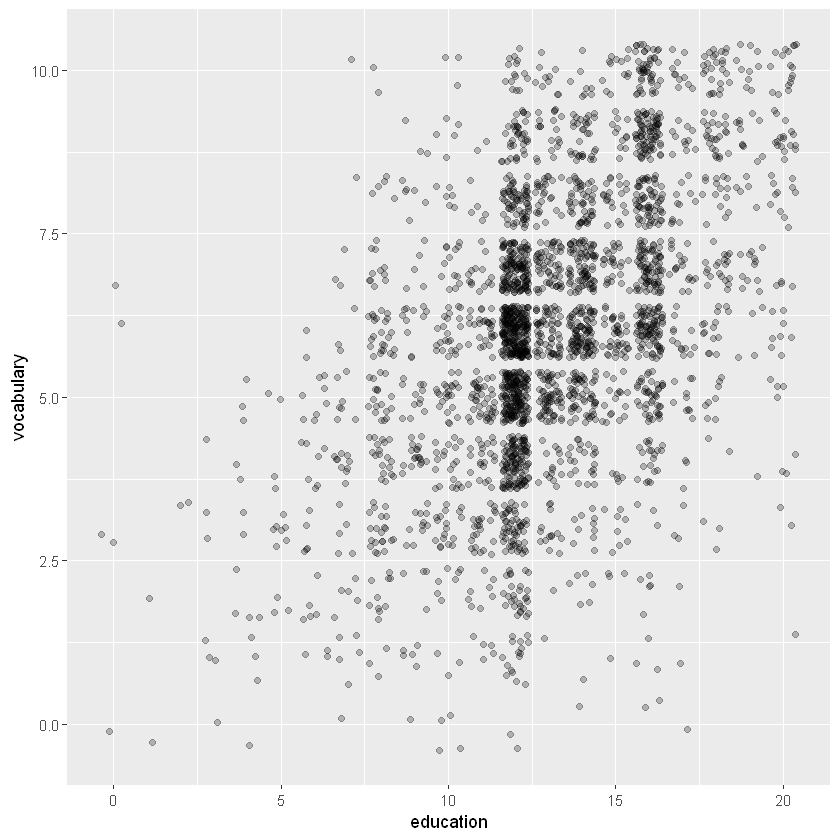

In [14]:
# Amend the plot to color by year_group
ggplot(Vocab, aes(x = education, y = vocabulary)) +
  geom_jitter(alpha = 0.25) +
  stat_quantile(quantiles = c(0.05, 0.5, 0.95))

-   Amend the plot to color according to `year_group`.


Warning message:
"Computation failed in `stat_quantile()`:
"


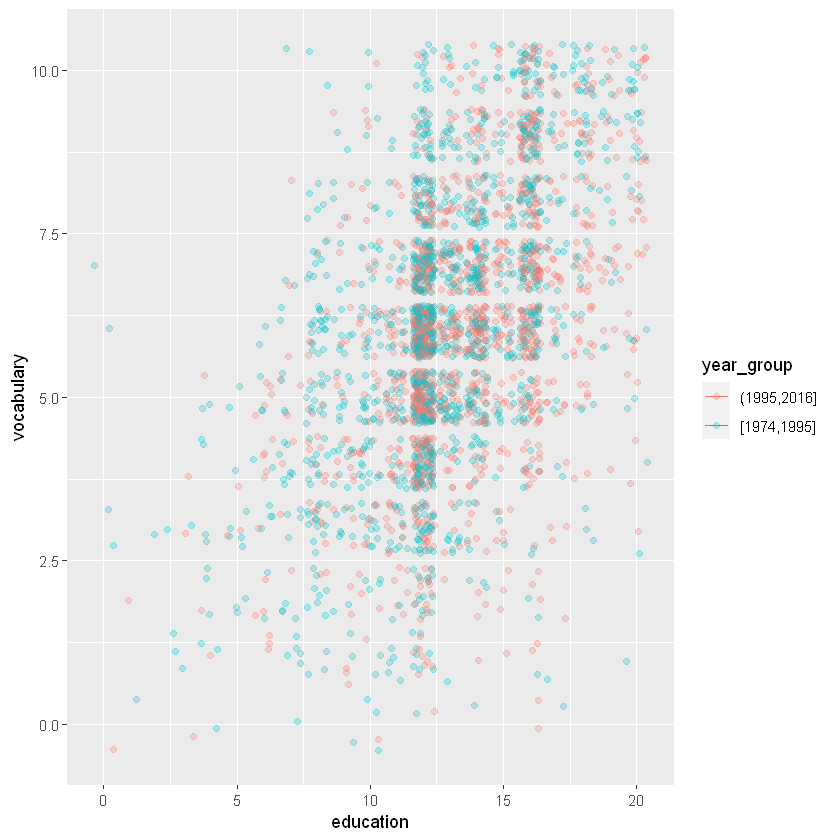

In [15]:
# Amend the plot to color by year_group
ggplot(Vocab, aes(x = education, y = vocabulary, mapping = "All", color = year_group)) +
  geom_jitter(alpha = 0.25) +
  stat_quantile(quantiles = c(0.05, 0.5, 0.95))

### **`06-Using stat_sum`** 

In the `Vocab` dataset, `education` and `vocabulary` are integer variables. In the first course, you saw that this is one of the four causes of overplotting. You'd get a single point at each intersection between the two variables.

One solution, shown in the step 1, is jittering with transparency. Another solution is to use `stat_sum()`, which calculates the total number of overlapping observations and maps that onto the `size` aesthetic.

`stat_sum()` allows a special variable, `..prop..`, to show the *proportion* of values within the dataset.

-   Run the code to see how jittering & transparency solves overplotting.

-   Replace the jittered points with a sum stat, using `stat_sum()`.

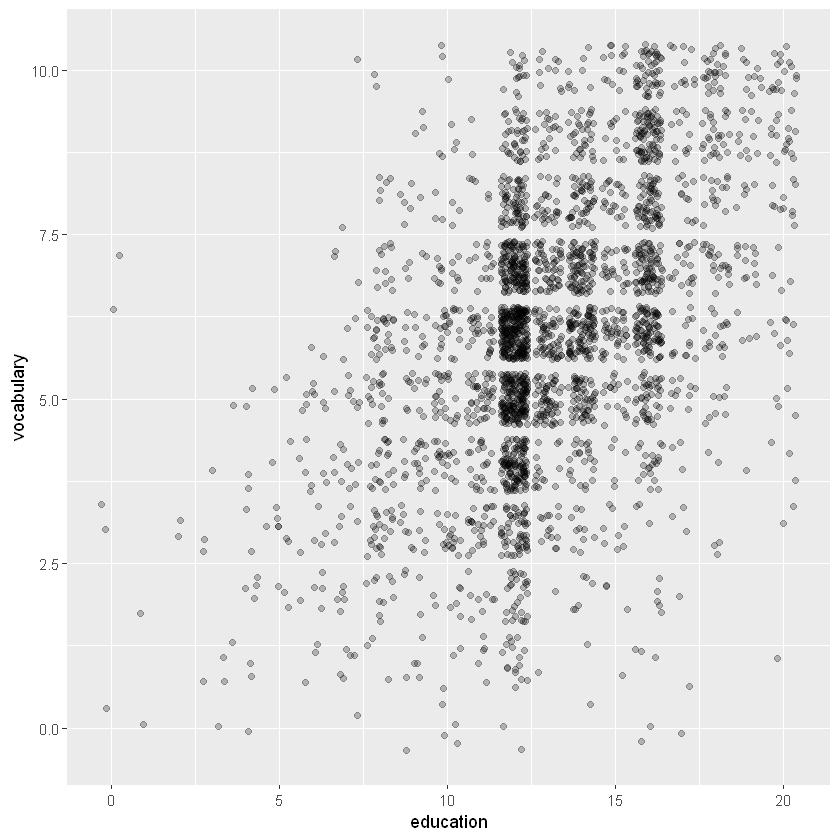

In [16]:
# Run this, look at the plot, then update it
ggplot(Vocab, aes(x = education, y = vocabulary)) +
  # Replace this with a sum stat
  geom_jitter(alpha = 0.25)

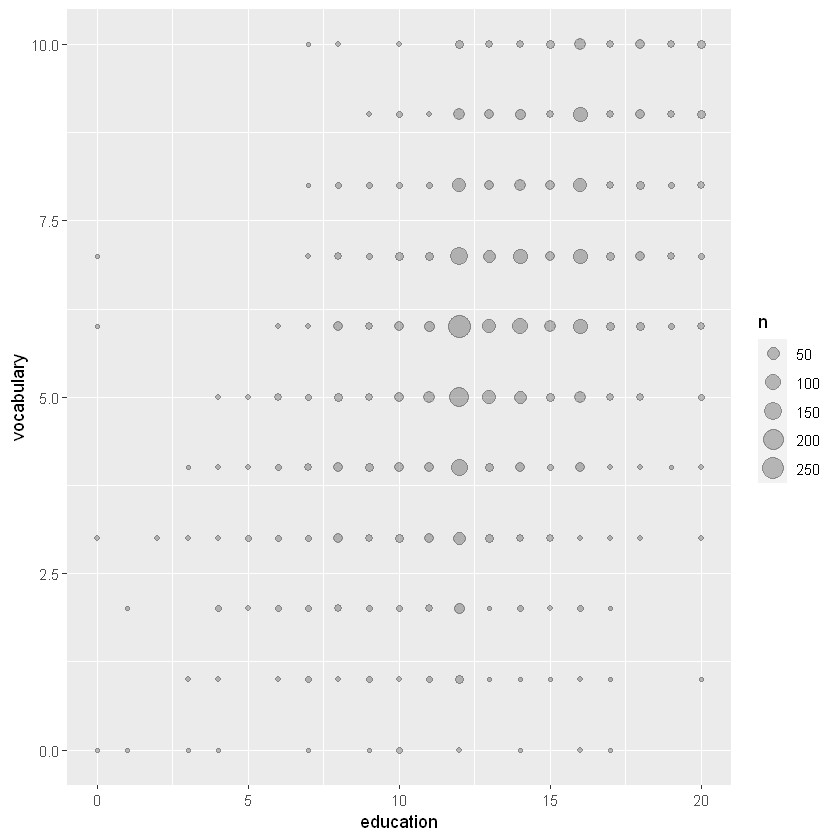

In [17]:
# Run this, look at the plot, then update it
ggplot(Vocab, aes(x = education, y = vocabulary)) +
  # Replace this with a sum stat
  stat_sum(alpha = 0.25)

Modify the size *aesthetic* with the appropriate scale function.

-   Add a `scale_size()` function to set the `range` from `1` to `10`.

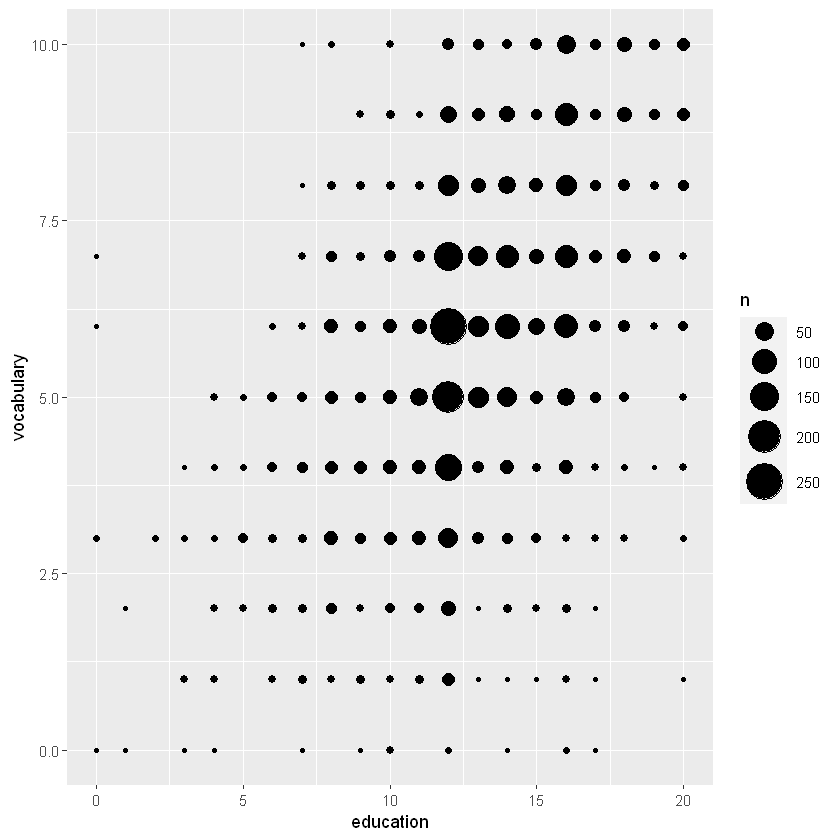

In [18]:
ggplot(Vocab, aes(x = education, y = vocabulary)) +
  stat_sum() +
  # Add a size scale, from 1 to 10
  scale_size(range = c(1,10))

-   Inside `stat_sum()`, set `size` to `..prop..` so circle size represents the proportion of the whole dataset.

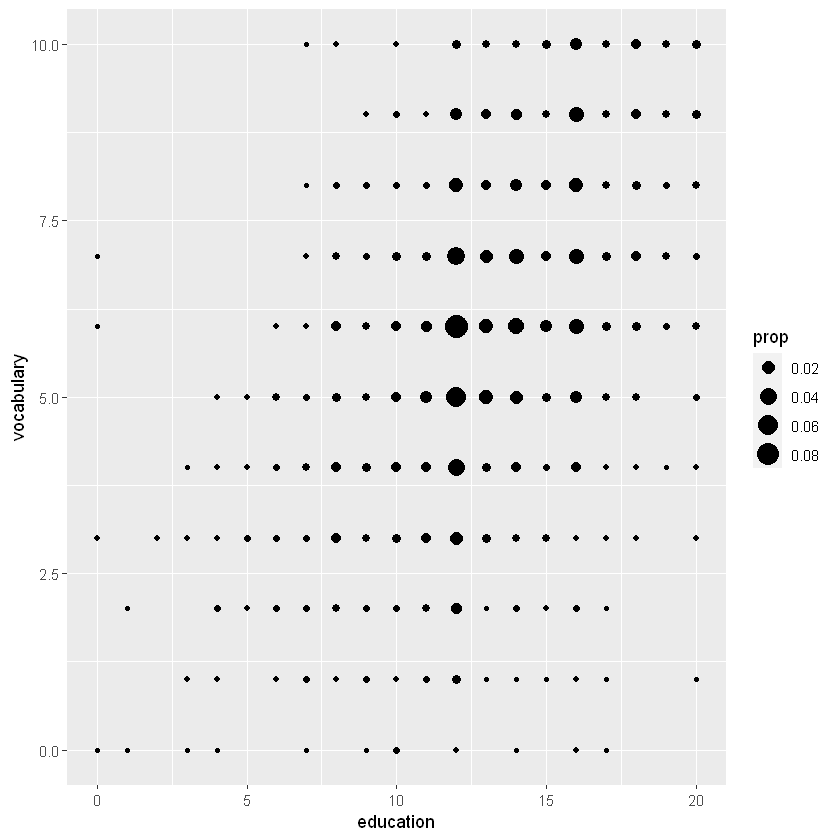

In [19]:
# Amend the stat to use proportion sizes
ggplot(Vocab, aes(x = education, y = vocabulary)) +
  stat_sum(aes(size = ..prop..))

-   Update the plot to group by `education`, so that circle size represents the proportion of the group.

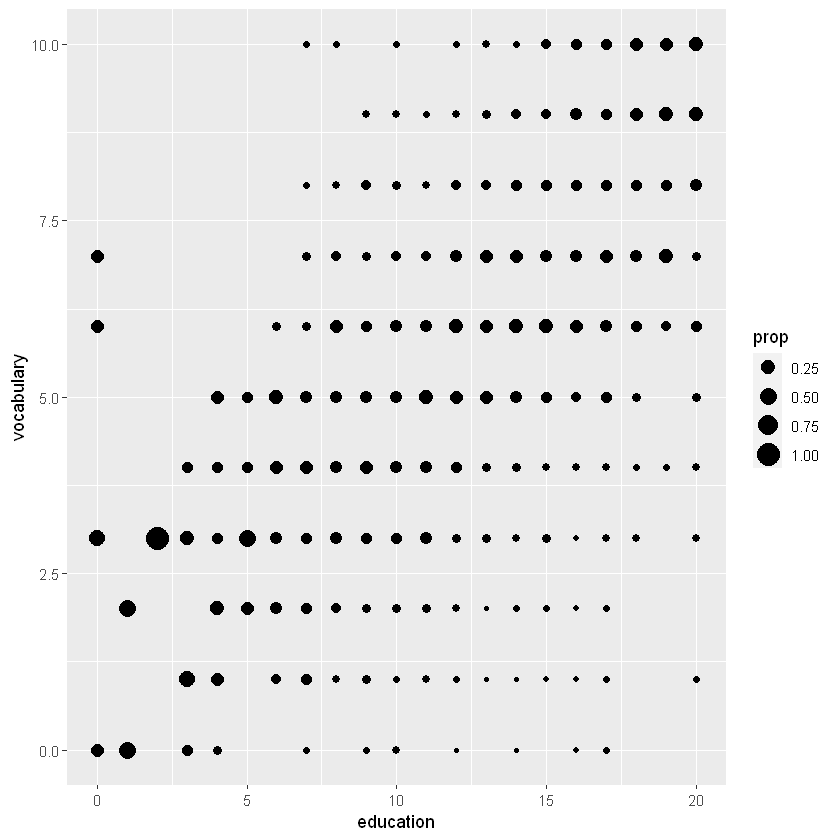

In [20]:
# Amend the plot to group by education
ggplot(Vocab, aes(x = education, y = vocabulary, group = education)) +
  stat_sum(aes(size = ..prop..))

### **`07-Preparations`**

In the following exercises, we'll aim to make the plot shown in the viewer. Here, we'll establish our positions and base layer of the plot.

Establishing these items as independent objects will allow us to recycle them easily in many layers, or plots.

-   `position_jitter()` adds *jittering* (e.g. for points).

-   `position_dodge()` *dodges* geoms, (e.g. bar, col, boxplot, violin, errorbar, pointrange).

-   `position_jitterdodge()` *jitters* **and** *dodges* geoms, (e.g. points).

As before, we'll use `mtcars`, where `fcyl` and `fam` are proper factor variables of the original `cyl` and `am` variables.

#### `Questions:`

-   Using these three functions, define these position objects:

-   `posn_j`: will *jitter* with a `width` of `0.2`.

-   `posn_d`: will *dodge* with a `width` of `0.1`.

-   `posn_jd` will *jitter* **and** *dodge* with a `jitter.width` of `0.2` and a `dodge.width` of `0.1`

In [21]:
# Define position objects
# 1. Jitter with width 0.2
posn_j <- position_jitter(width = 0.2)

# 2. Dodge with width 0.1
posn_d <- position_dodge(width = 0.1)

# 3. Jitter-dodge with jitter.width 0.2 and dodge.width 0.1
posn_jd <- position_jitterdodge(jitter.width = 0.2, dodge.width = 0.1)

-   Plot `wt` vs. `fcyl`, colored by `fam`. Assign this base layer to `p_wt_vs_fcyl_by_fam`.

-   Plot the data using `geom_point()`.


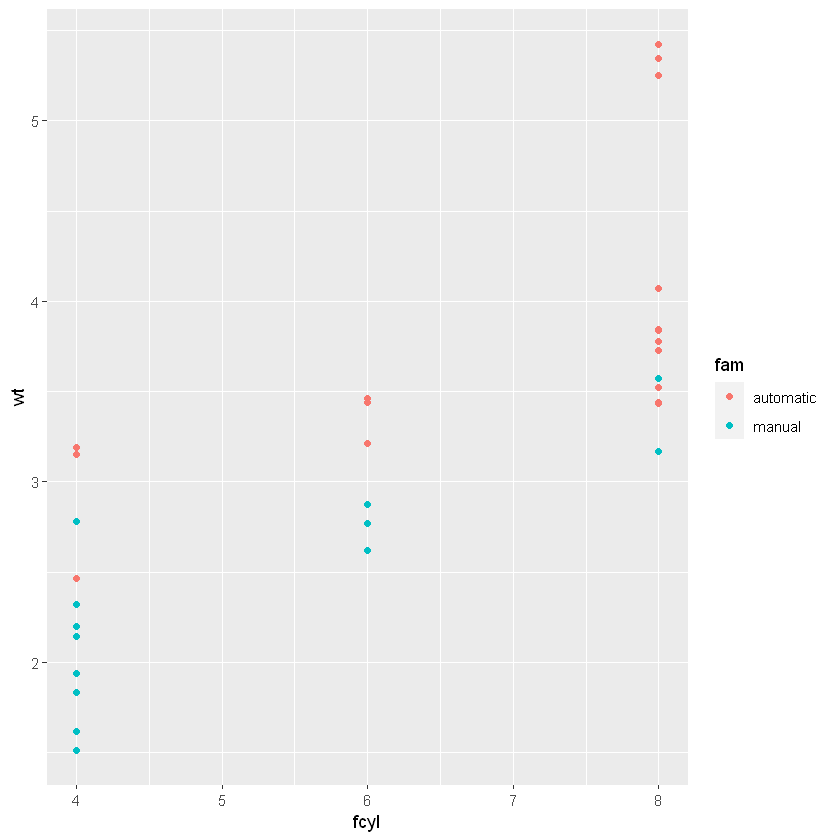

In [22]:
# From previous step
posn_j <- position_jitter(width = 0.2)
posn_d <- position_dodge(width = 0.1)
posn_jd <- position_jitterdodge(jitter.width = 0.2, dodge.width = 0.1)

# Create the plot base: wt vs. fcyl, colored by fam
p_wt_vs_fcyl_by_fam <- ggplot(mtcars ,aes(fcyl, wt, color = fam))

# Add a point layer
p_wt_vs_fcyl_by_fam +
  geom_point()

### **`08-Using position objects`**

-   Apply the jitter position, `posn_j`, to the base plot.

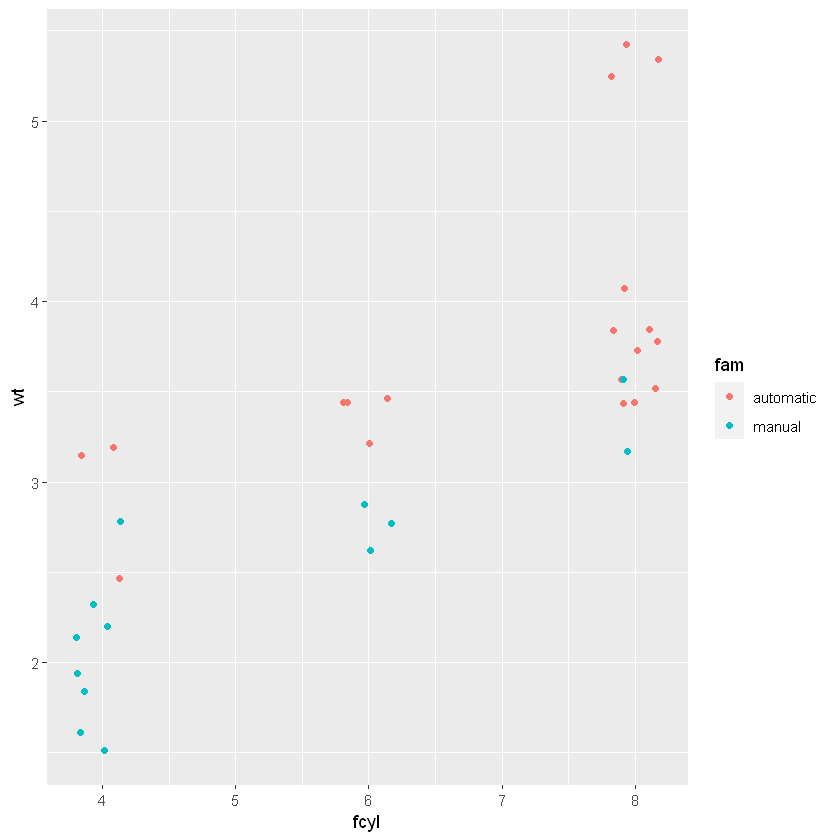

In [23]:
# Add jittering only
p_wt_vs_fcyl_by_fam +
  geom_point(position = posn_j)

-   Apply the dodge position, `posn_d`, to the base plot.


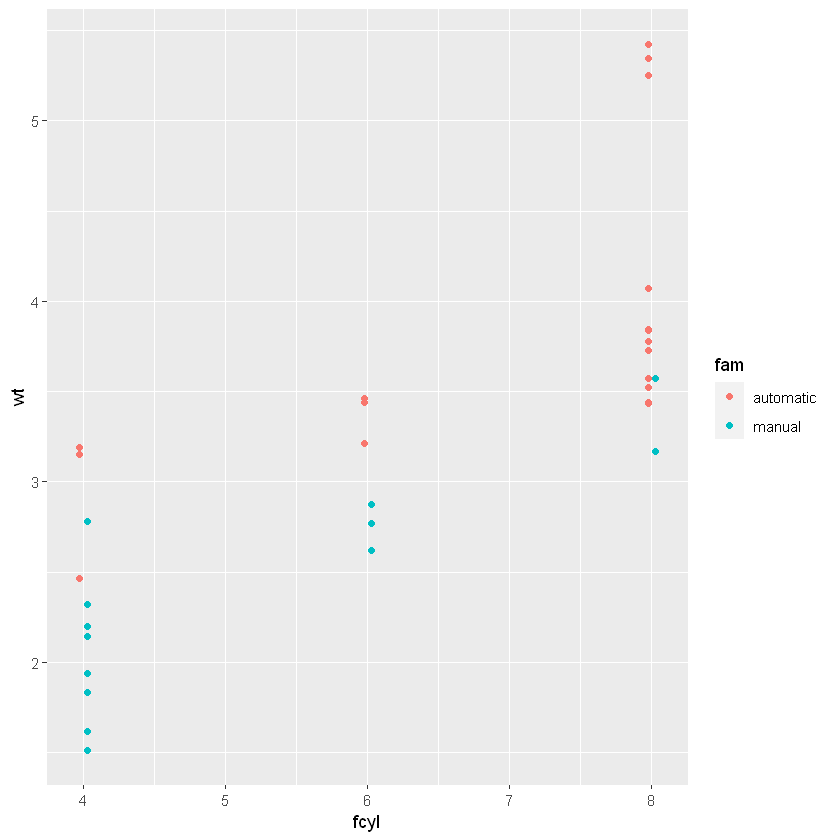

In [24]:
# Add dodging only
p_wt_vs_fcyl_by_fam +
  geom_point(position = posn_d)

-   Apply the jitter-dodge position, `posn_jd`, to the base plot.


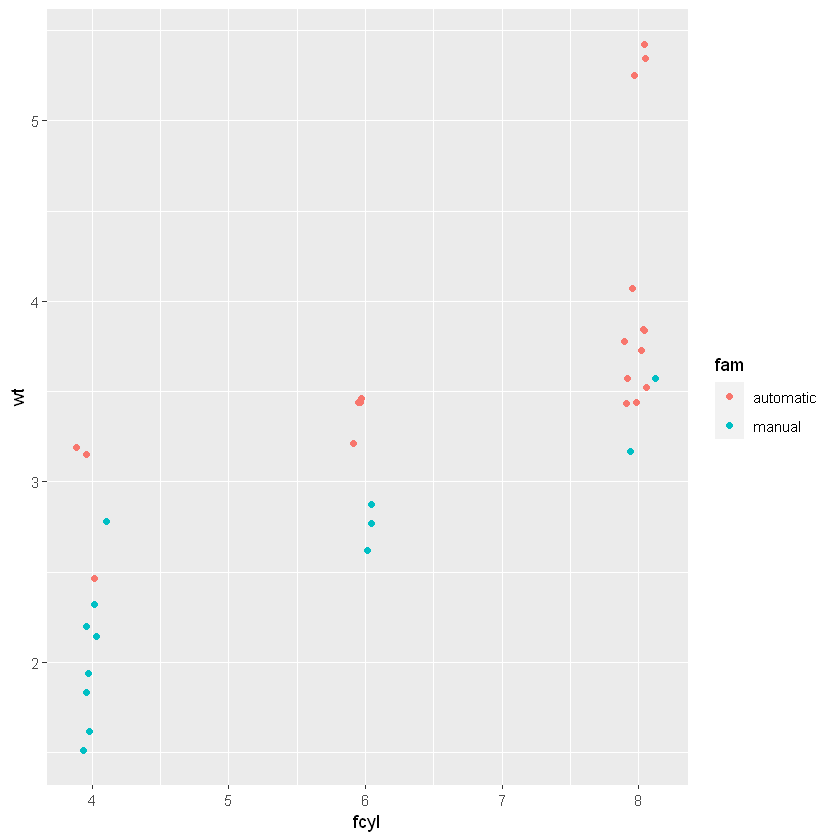

In [25]:
# Add jittering and dodging
p_wt_vs_fcyl_by_fam +
  geom_point(position = posn_jd)

### `09-Plotting variations`

The preparation is done; now let's explore `stat_summary()`.

*Summary statistics* refers to a combination of *location* (mean or median) and *spread* (standard deviation or confidence interval).

These metrics are calculated in `stat_summary()` by passing a function to the `fun.data` argument. `mean_sdl()`, calculates multiples of the standard deviation and `mean_cl_normal()` calculates the t-corrected 95% CI.

Arguments to the data function are passed to `stat_summary()`'s `fun.args` argument as a list.

The position object, `posn_d`, and the plot with jittered points, `p_wt_vs_fcyl_by_fam_jit`, are available.

In [26]:
p_wt_vs_fcyl_by_fam_jit <- p_wt_vs_fcyl_by_fam +
  geom_point(position = posn_j)


#### `Questions`

Add error bars representing the standard deviation.

-   Set the data function to `mean_sdl` (without parentheses).

-   Draw 1 standard deviation each side of the mean, pass arguments to the `mean_sdl()` function by assigning them to `fun.args` in the form of a list.

-   Use `posn_d` to set the position

Warning message:
"Computation failed in `stat_summary()`:
"


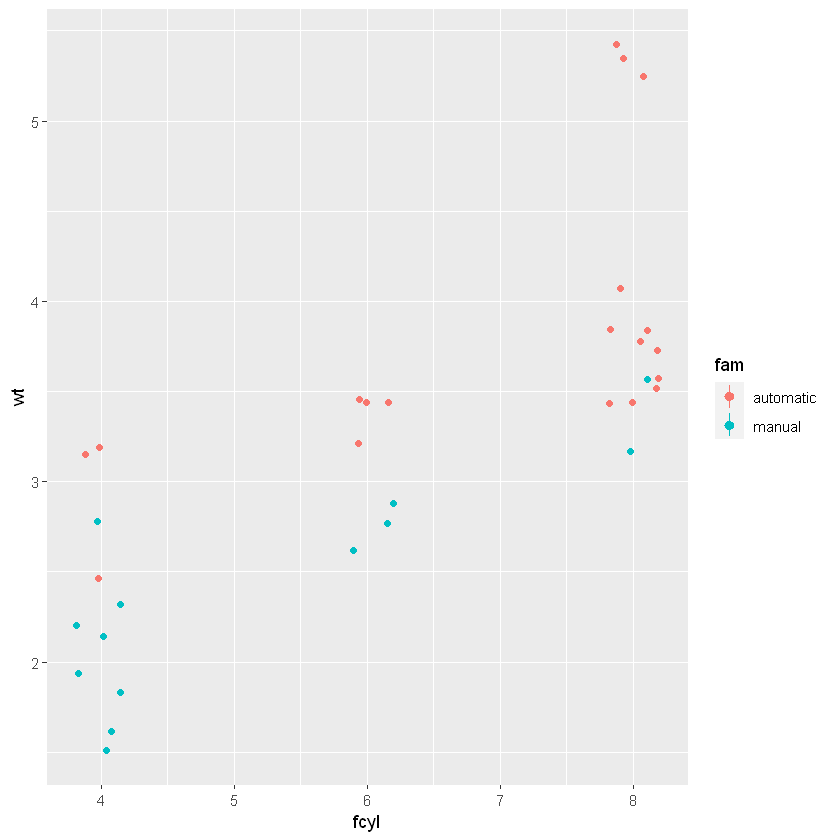

In [27]:
p_wt_vs_fcyl_by_fam_jit +
  # Add a summary stat of std deviation limits
  stat_summary(fun.data = mean_sdl, 
               fun.args =list(mult =1), 
               position = posn_d)

The default geom for `stat_summary()` is `"pointrange"` which is already great.

-   Update the summary stat to use an `"errorbar"` geom by assigning it to the `geom` argument.

Warning message:
"Computation failed in `stat_summary()`:
"


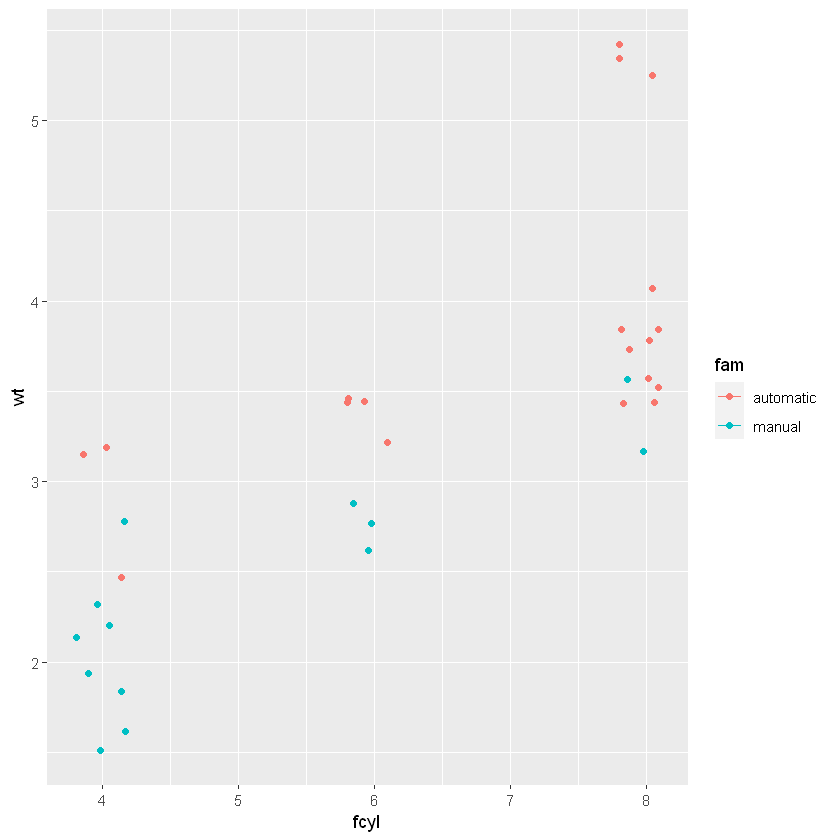

In [28]:
p_wt_vs_fcyl_by_fam_jit +
  # Change the geom to be an errorbar
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), position = posn_d, 
  geom ="errorbar")

-   Update the plot to add a summary stat of 95% confidence limits.

-   Set the data function to `mean_cl_normal` (without parentheses).

-   Again, use the dodge position.

Warning message:
"Computation failed in `stat_summary()`:
"


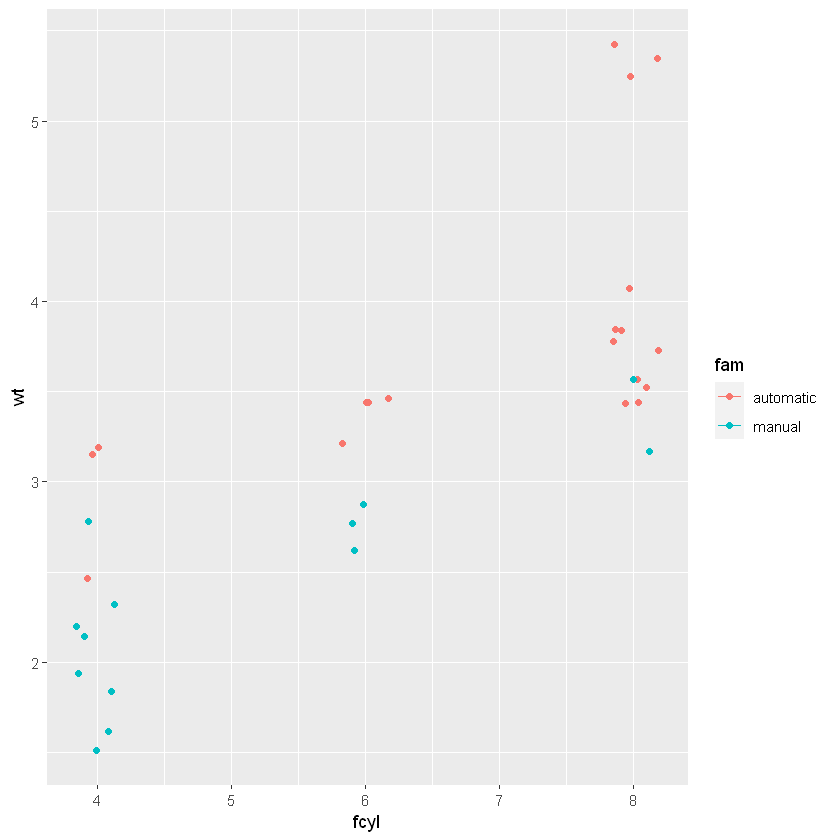

In [34]:
p_wt_vs_fcyl_by_fam_jit +
  # Add a summary stat of normal confidence limits
  stat_summary(fun.data = mean_cl_normal, fun.args = list(mult = 1),
               position = posn_d, geom ="errorbar")

### **`The End`**